In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_url = "https://data.cityofchicago.org/resource/85ca-t3if.csv"
df = pd.read_csv(dataset_url)

# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                1000 non-null   object 
 1   crash_date_est_i               54 non-null     object 
 2   crash_date                     1000 non-null   object 
 3   posted_speed_limit             1000 non-null   int64  
 4   traffic_control_device         1000 non-null   object 
 5   device_condition               1000 non-null   object 
 6   weather_condition              1000 non-null   object 
 7   lighting_condition             1000 non-null   object 
 8   first_crash_type               1000 non-null   object 
 9   trafficway_type                1000 non-null   object 
 10  lane_cnt                       0 non-null      float64
 11  alignment                      1000 non-null   object 
 12  roadway_surface_cond           1000 non-null   ob

None

,crash_record_id,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,...,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,083249928d593064564f91cb965c207f10a8566542a711...,NaN,2025-02-27T01:00:00.000,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,REAR END,NOT DIVIDED,...,0.0,0.0,3.0,0.0,1,5,2,41.879976,-87.764712,POINT (-87.764712486675 41.879975622162)
1,f9f88eeac47916b05ca28ae2eca6da82b2d4eb20317d6b...,NaN,2025-02-27T00:27:00.000,30,UNKNOWN,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,...,1.0,0.0,1.0,0.0,0,5,2,41.659009,-87.617448,POINT (-87.617447906473 41.659009215787)
2,5c5044d44742d849741c78c3873cca9f80398385640052...,NaN,2025-02-26T21:39:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,21,4,2,41.881321,-87.668542,POINT (-87.668542180871 41.881321121153)
3,391fe9556b014e9d2ec169e69dda2028927827aa291d5d...,NaN,2025-02-26T20:53:00.000,45,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,...,1.0,0.0,1.0,0.0,20,4,2,41.873191,-87.617458,POINT (-87.617458140248 41.873190589037)
4,6b6d844f108c9641715da81ec73514cf5b234f369ddd72...,NaN,2025-02-26T20:36:00.000,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,1.0,0.0,1.0,0.0,20,4,2,41.932300,-87.667915,POINT (-87.667915109974 41.932299516942)


In [ ]:
# Part 1: Data Cleaning
## Handling missing values
df.dropna(subset=['crash_date', 'latitude', 'longitude'], inplace=True)
df.fillna({'injuries_fatal': 0, 'injuries_total': 0}, inplace=True)

In [ ]:

## Remove duplicates
df.drop_duplicates(inplace=True)

## Standardizing column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

df['crash_date'] = pd.to_datetime(df['crash_date'])
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['day_of_week'] = df['crash_date'].dt.day_name()

df.to_csv("clean_chicago_traffic.csv", index=False)

<ipython-input-20-c34241f21319>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


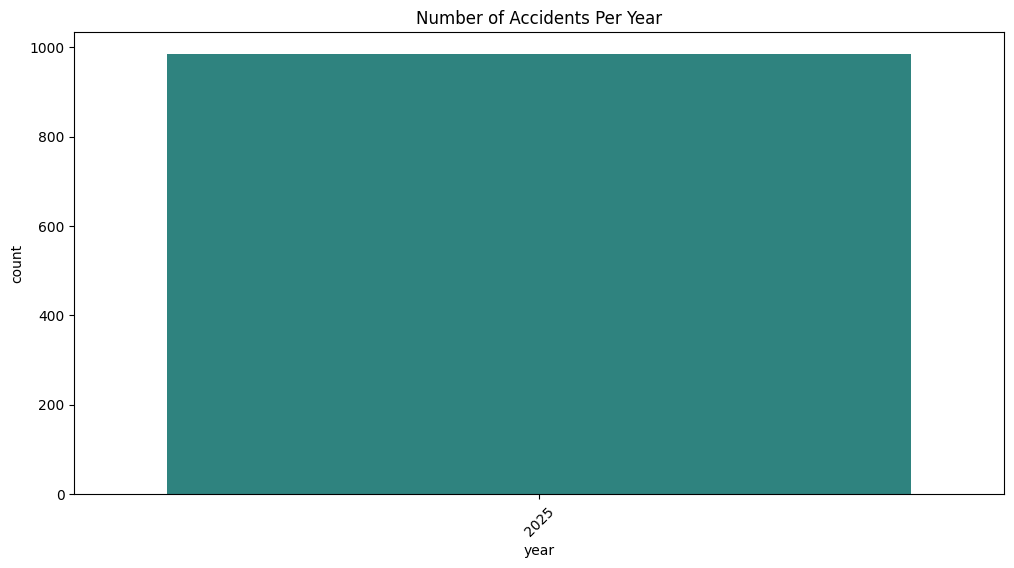

In [ ]:
# Part 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Number of Accidents Per Year')
plt.xticks(rotation=45)
plt.show()


<ipython-input-21-423b8c8b1aee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='coolwarm')


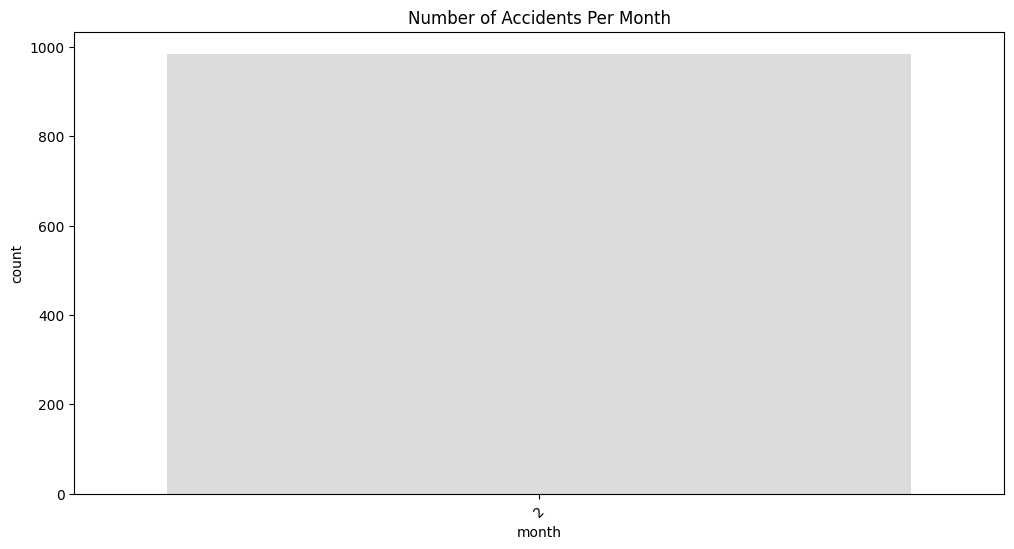

In [ ]:
#Visualization 2
## Number of accidents per month
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month', palette='coolwarm')
plt.title('Number of Accidents Per Month')
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-c8d4e5f2dd1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='magma')


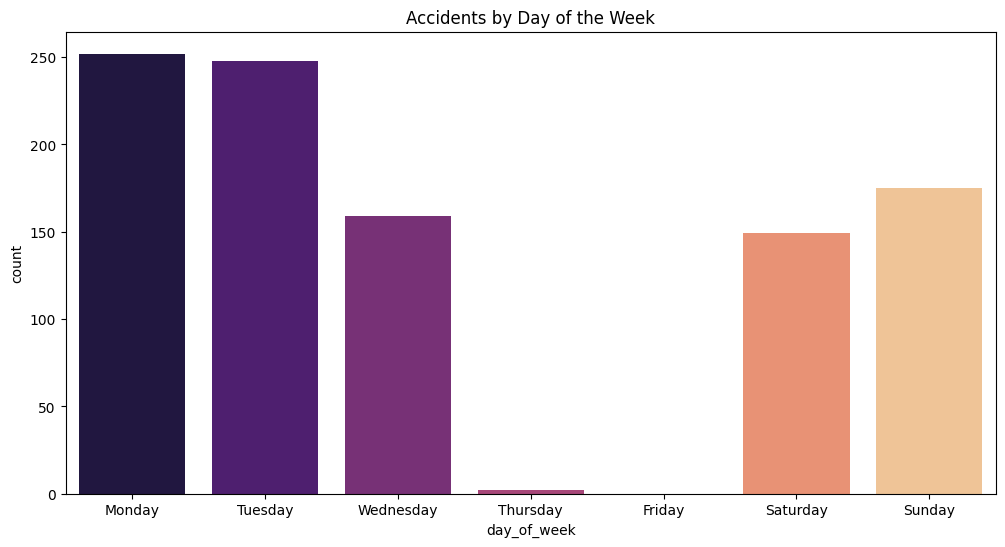

In [ ]:
#Visualization 3
# Distribution of accidents by day of the week
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='magma')
plt.title('Accidents by Day of the Week')
plt.show()

<ipython-input-23-6861c0c1c747>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='weather_condition', order=df['weather_condition'].value_counts().index, palette='inferno')


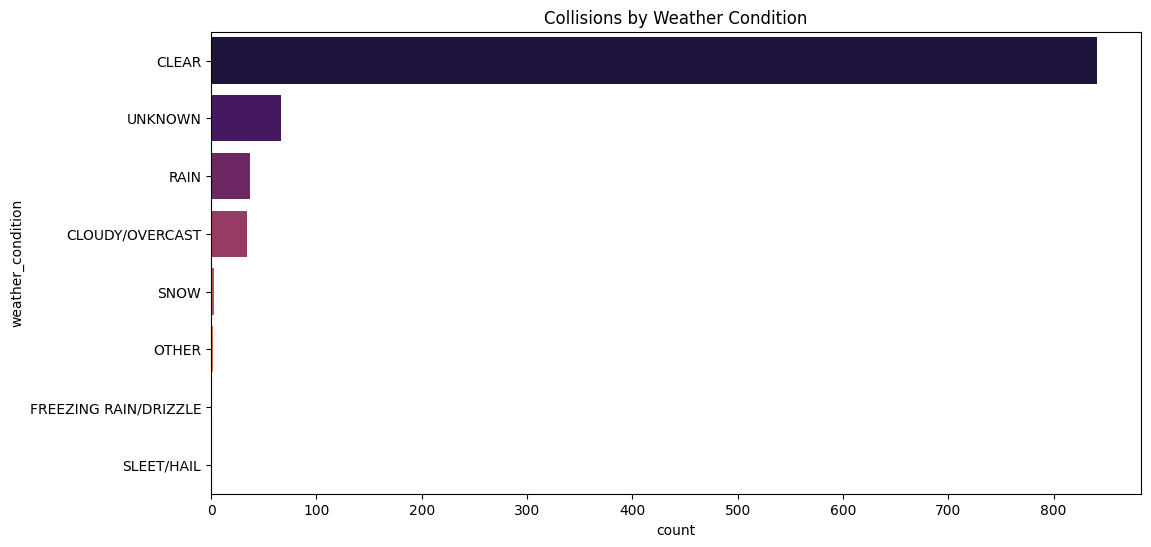

In [ ]:
##Visualization 4
# Correlation between weather conditions and collisions
if 'weather_condition' in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, y='weather_condition', order=df['weather_condition'].value_counts().index, palette='inferno')
    plt.title('Collisions by Weather Condition')
    plt.show()

<ipython-input-22-f2dcd943d34f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crash_hour', palette='plasma')


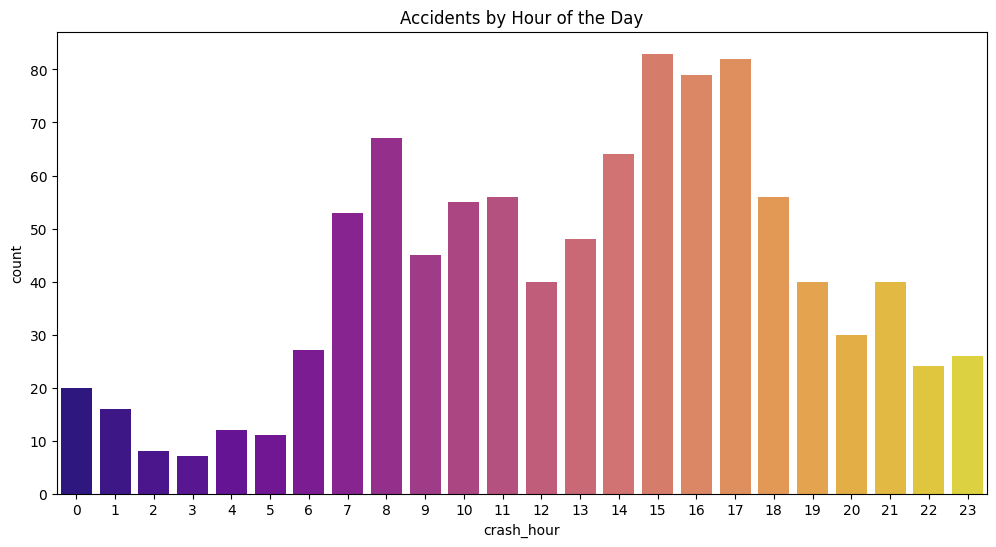

In [22]:
#Visualization 5
# Accidents by hour of the day
if 'crash_hour' in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x='crash_hour', palette='plasma')
    plt.title('Accidents by Hour of the Day')
    plt.show()


<ipython-input-8-44e2d0f48cc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='traffic_control_device', palette='spring')


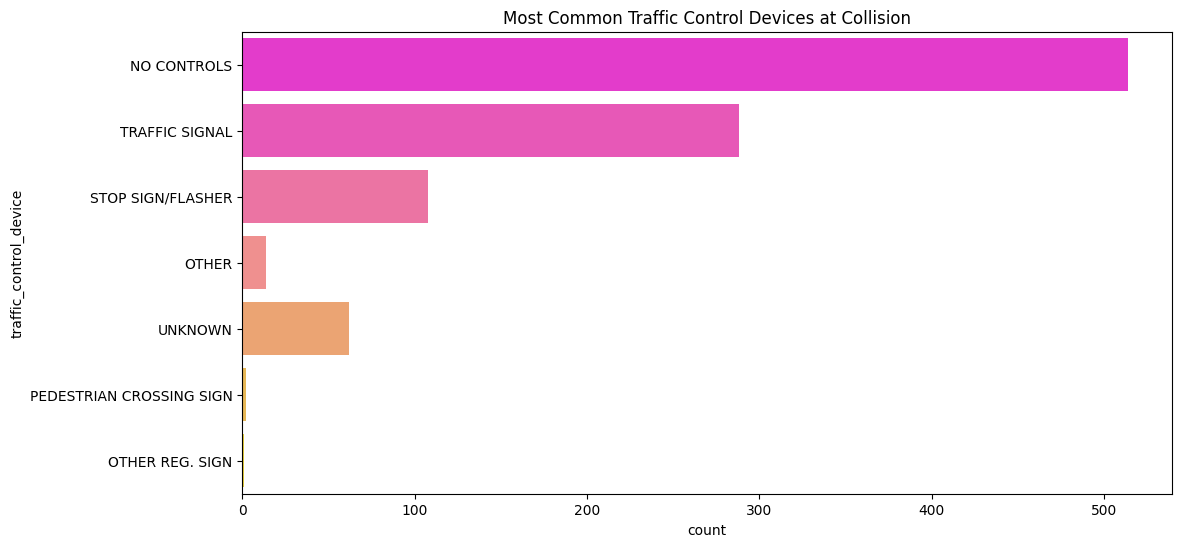

In [8]:
#Visualization 6
#Traffic Control Devices at Collision
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='traffic_control_device', palette='spring')
plt.title('Most Common Traffic Control Devices at Collision')
plt.show()

<ipython-input-9-6c2bfe84fbc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='first_crash_type', palette='cool')


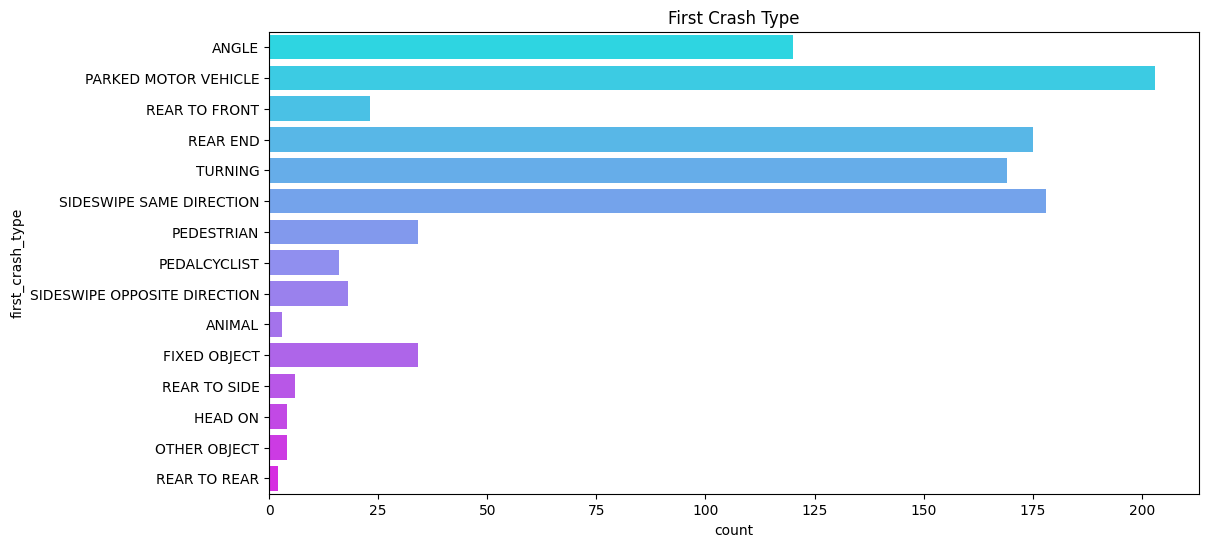

In [9]:
#Visualization 7
#First Crash Type
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='first_crash_type', palette='cool')
plt.title('First Crash Type')
plt.show()

<ipython-input-11-fec8cbe2dc02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='lighting_condition', palette='viridis')


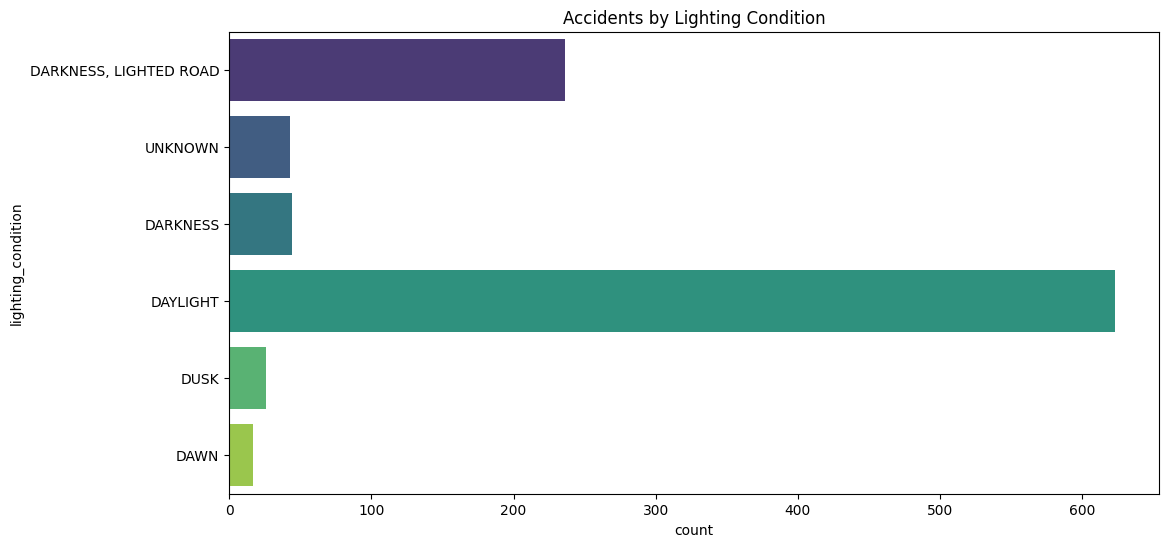

In [11]:
#Visualization 8
# Lighting Condition of Accidents
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='lighting_condition', palette='viridis')
plt.title('Accidents by Lighting Condition')
plt.show()

<ipython-input-12-470126bb41cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='damage', palette='rocket')


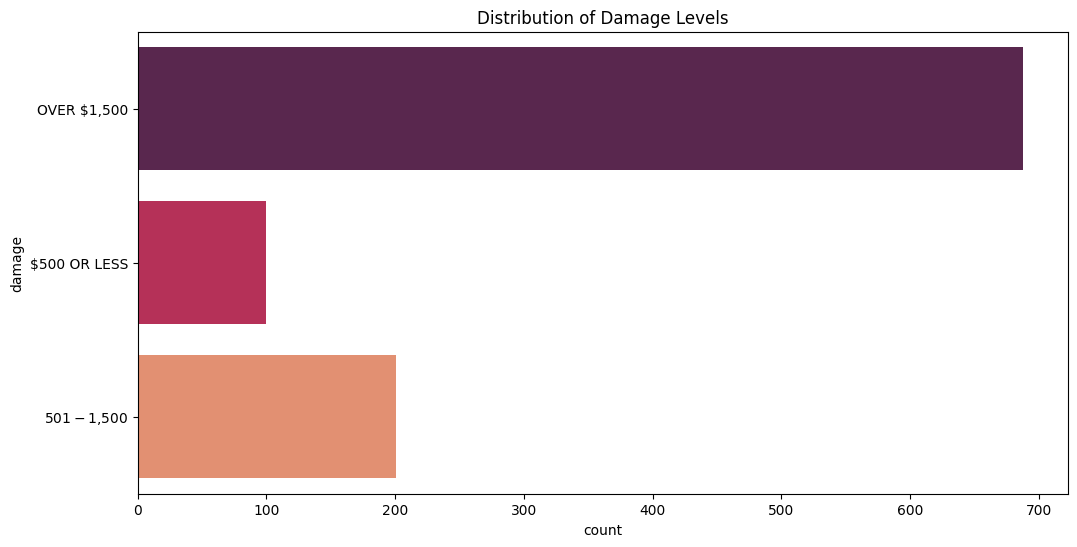

In [12]:
#Visualization 9
#Damage Level Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='damage', palette='rocket')
plt.title('Distribution of Damage Levels')
plt.show()

<ipython-input-13-0c9b63c05e8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='crash_type', palette='plasma')


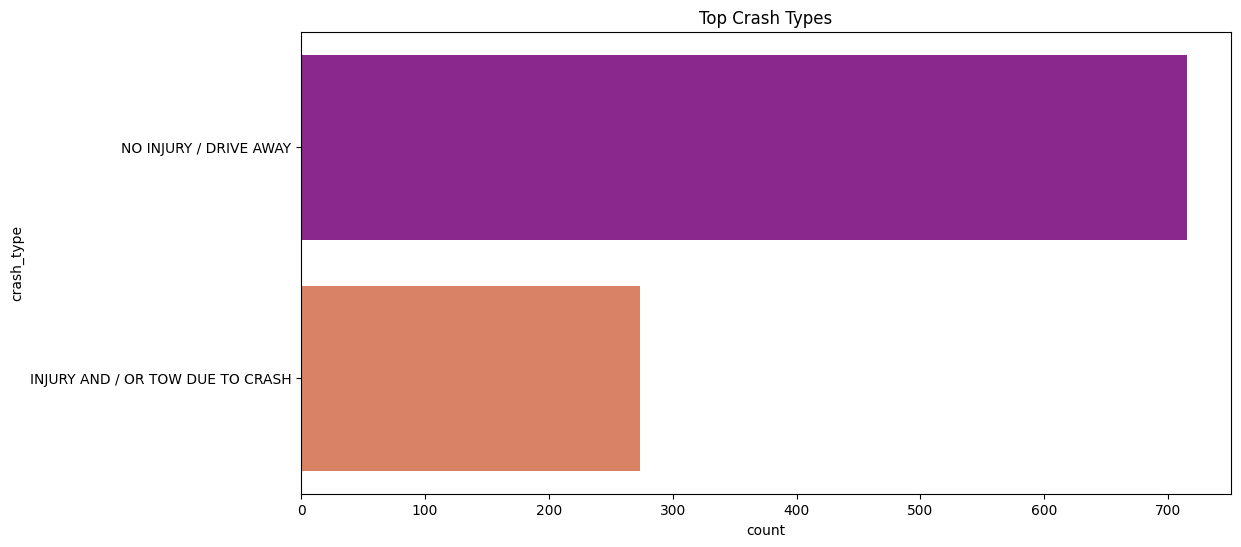

In [13]:
#Visualization 10
#Top Crash Types
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='crash_type', palette='plasma')
plt.title('Top Crash Types')
plt.show()

<ipython-input-14-dde3a31f7a69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='report_type', palette='coolwarm')


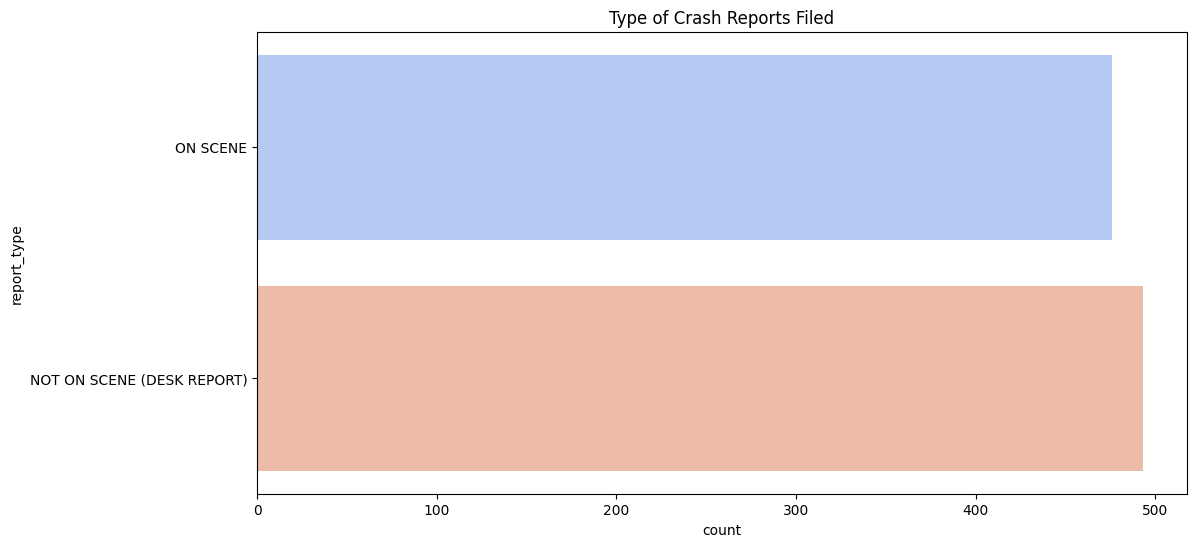

In [14]:
#Visualization 11
#Type of Crash Reports Filed
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='report_type', palette='coolwarm')
plt.title('Type of Crash Reports Filed')
plt.show()

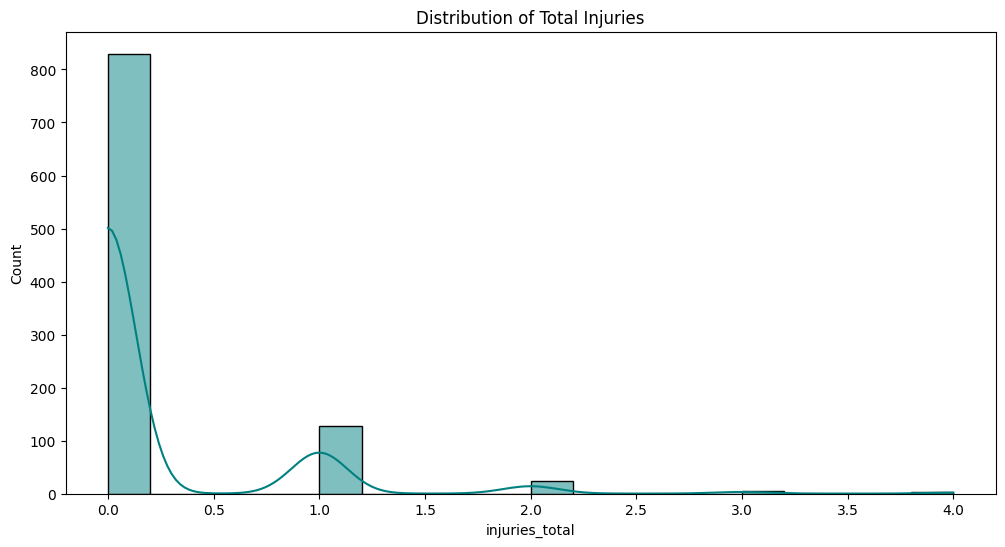

In [15]:
#Visualization 12
#Distribution of Total Injuries
plt.figure(figsize=(12,6))
sns.histplot(df['injuries_total'].dropna(), bins=20, kde=True, color='teal')
plt.title('Distribution of Total Injuries')
plt.show()

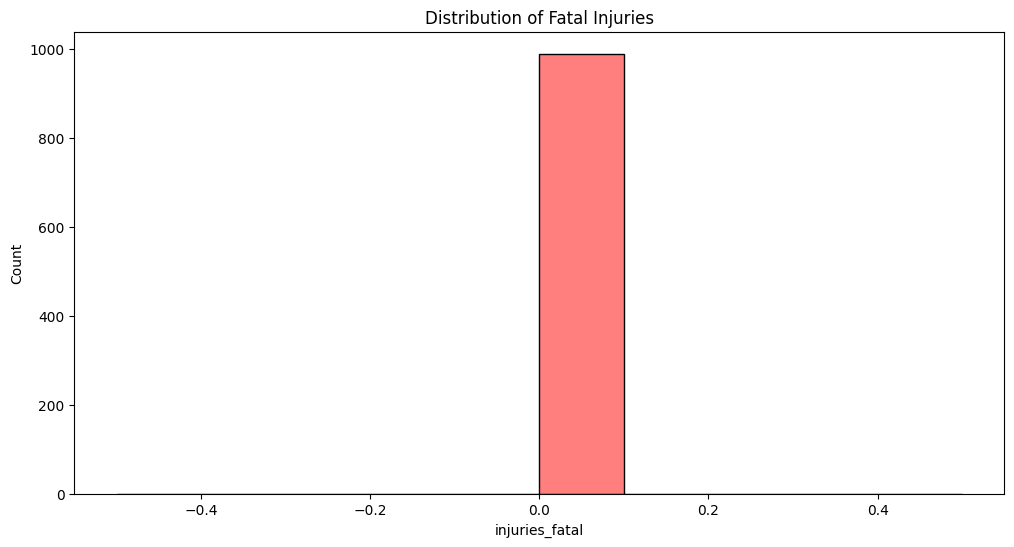

In [16]:
#Visualization 13
#Distribution of Fatal Injuries
plt.figure(figsize=(12,6))
sns.histplot(df['injuries_fatal'].dropna(), bins=10, kde=True, color='red')
plt.title('Distribution of Fatal Injuries')
plt.show()

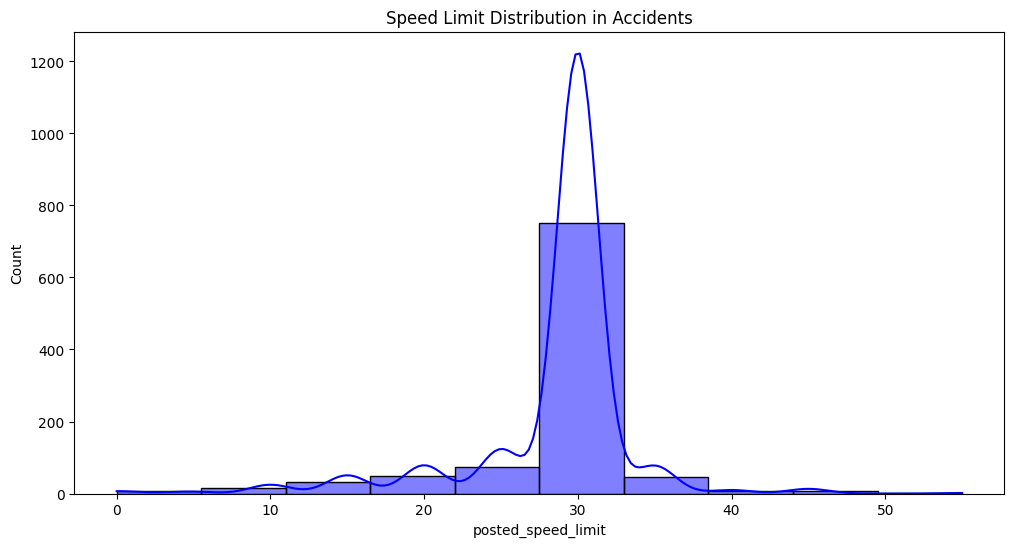

In [19]:
#Visualization 14
#Speed Limit Distribution in Accidents
plt.figure(figsize=(12,6))
sns.histplot(df['posted_speed_limit'].dropna(), bins=10, kde=True, color='blue')
plt.title('Speed Limit Distribution in Accidents')
plt.show()

<ipython-input-20-be7ecd4c34ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='intersection_related_i', palette='inferno')


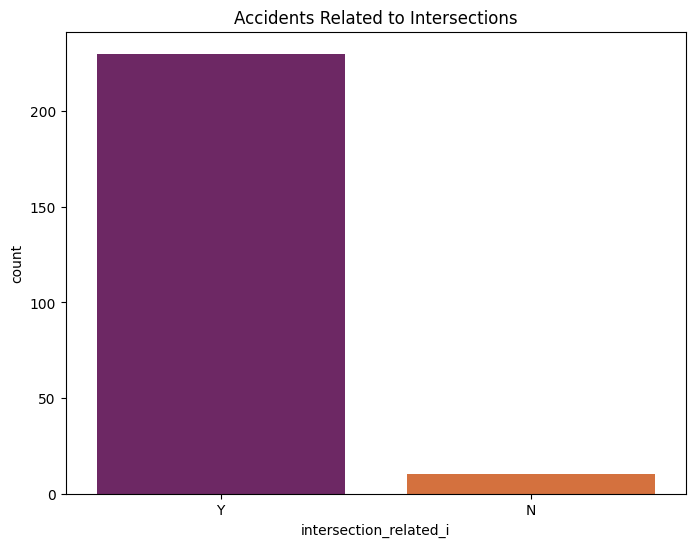

In [20]:
#Visualization 15
#Accidents Related to Intersections
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='intersection_related_i', palette='inferno')
plt.title('Accidents Related to Intersections')
plt.show()

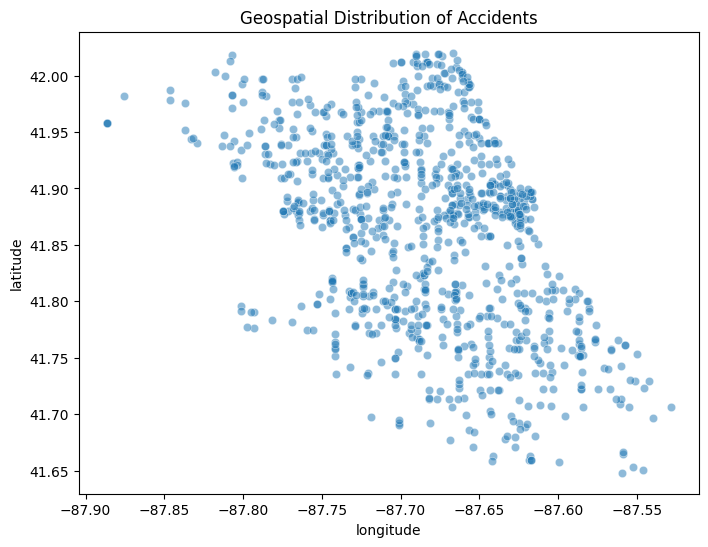

In [21]:
#Visualization 16
#Geospatial Distribution of Accidents
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.5)
plt.title('Geospatial Distribution of Accidents')
plt.show()

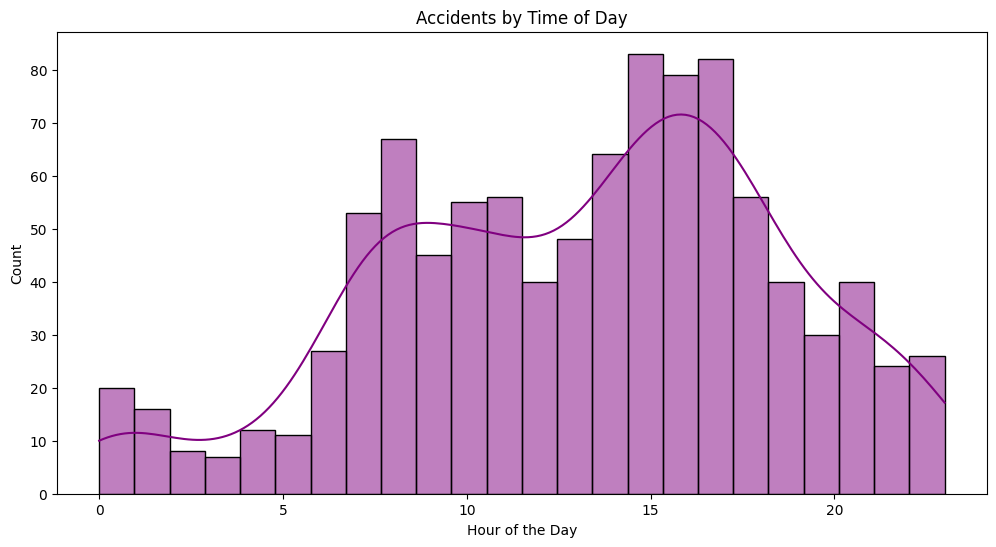

In [23]:
#Visualization 17
#Accidents by Time of Day
plt.figure(figsize=(12,6))
sns.histplot(df['crash_hour'].dropna(), bins=24, kde=True, color='purple')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.show()

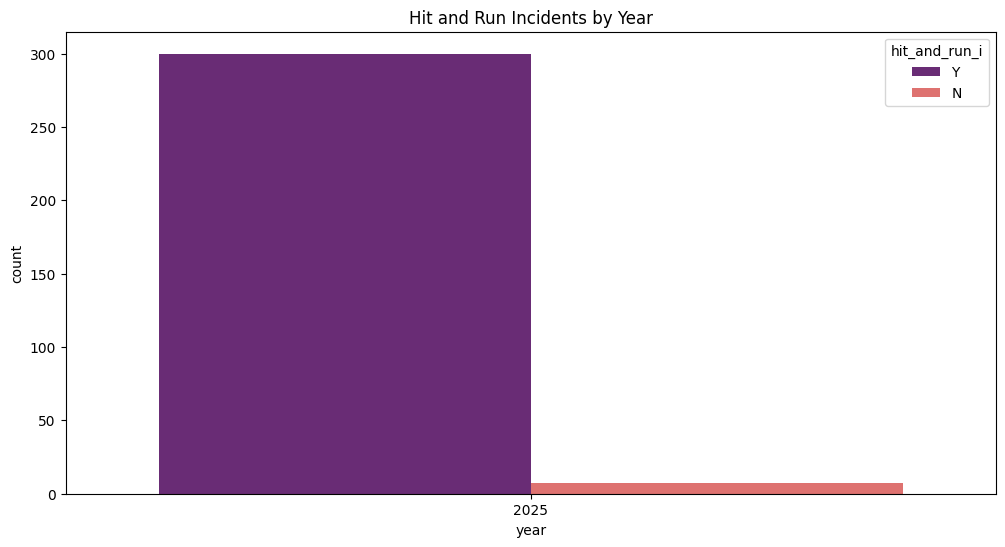

In [25]:
#Visualization 18
#Hit and Run Incidents by Year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year', hue='hit_and_run_i', palette='magma')
plt.title('Hit and Run Incidents by Year')
plt.show()

<ipython-input-26-55ed81e993b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weather_condition', y='injuries_fatal', palette='inferno')


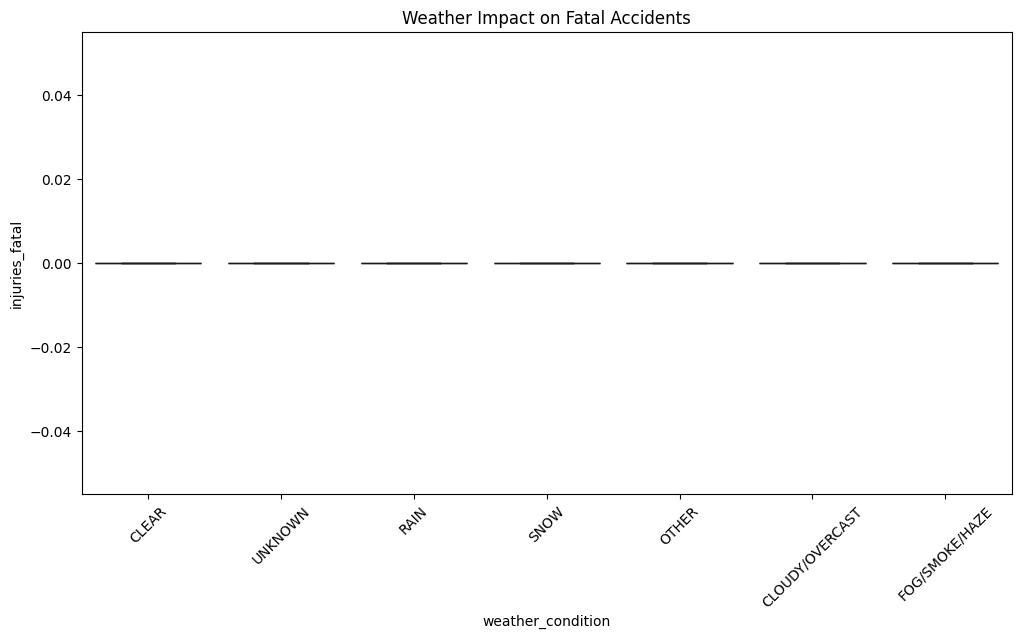

In [26]:
#Visualization 19
#Weather Impact on Fatal Accidents
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='weather_condition', y='injuries_fatal', palette='inferno')
plt.title('Weather Impact on Fatal Accidents')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-00f147067c4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='first_crash_type', palette='cividis')


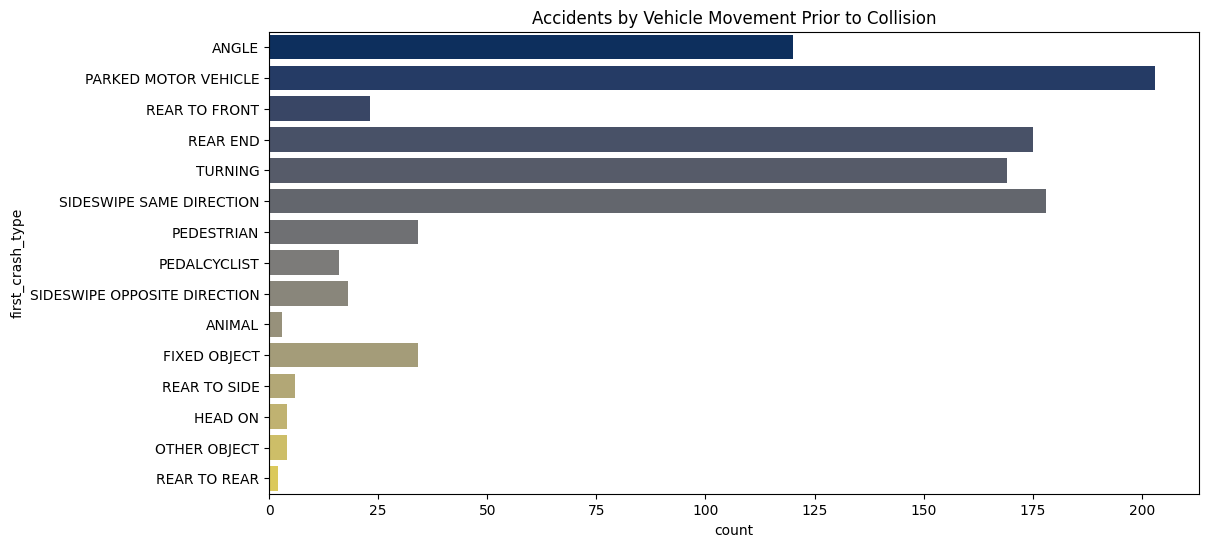

In [27]:
#Visualization 20
#Accidents by Vehicle Movement Prior to Collision
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='first_crash_type', palette='cividis')
plt.title('Accidents by Vehicle Movement Prior to Collision')
plt.show()


<ipython-input-29-7706fb81481a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='traffic_control_device', palette='pastel')


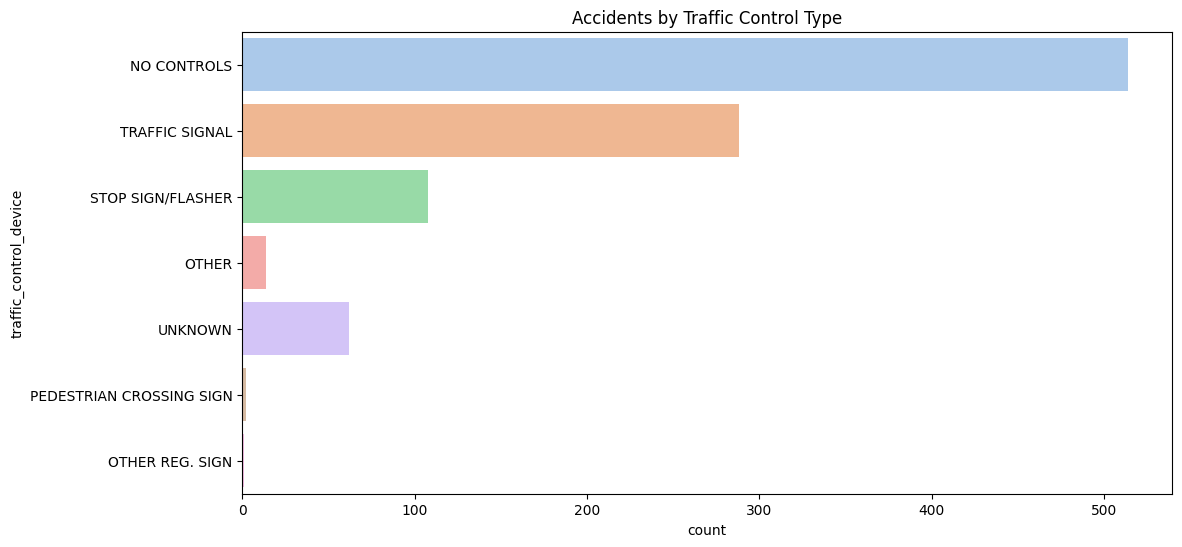

In [29]:
#Visualization 21
#Accidents by Traffic Control Type
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='traffic_control_device', palette='pastel')
plt.title('Accidents by Traffic Control Type')
plt.show()


In [30]:
# Save final cleaned dataset
df.to_csv("clean_chicago_traffic.csv", index=False)

In [31]:
from google.colab import files
files.download("clean_chicago_traffic.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>